# K Means Clustering

## Import Libraries and Data

In [1]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Data
produk = pd.read_csv("D:/Data Scientist/Dataset/Dataset - Clustering/Clustering_product.csv")
produk.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14\t
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15\t
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15\t
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15\t
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15\t


In [3]:
produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited	  3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [4]:
# Data kategori
categorical = ["Brand"]
df_categorical = produk[categorical]
df_categorical.head()

,Brand
0,Adidas ORIGINALS
1,Adidas ORIGINALS
2,Adidas CORE / NEO
3,Adidas CORE / NEO
4,Adidas ORIGINALS


In [5]:
#Ubah Last Visited menjadi Datetime

produk["Last Visited\t"] = pd.to_datetime(produk["Last Visited\t"])
produk.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15


> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

#### Produk apa yang paling banyak dilihat/dikunjungi customer?

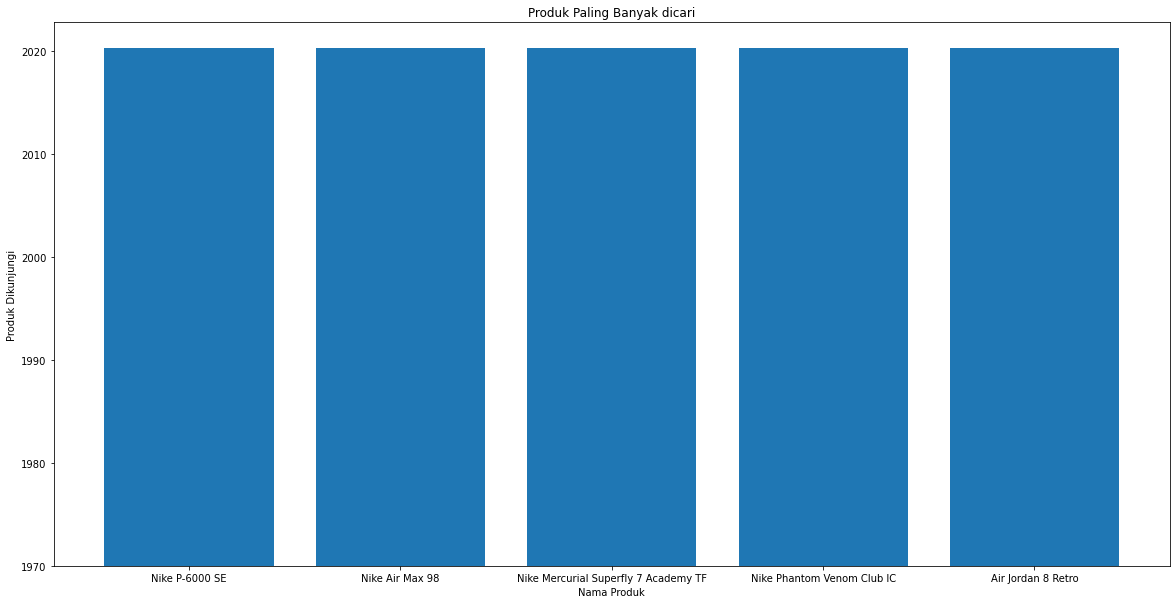

In [6]:
brands = produk.nlargest(5, "Last Visited\t")
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(brands["Product Name"], brands["Last Visited\t"])
plt.xlabel('Nama Produk')
plt.ylabel('Produk Dikunjungi')
plt.title('Produk Paling Banyak dicari')
plt.show()

> dari hasil diatas, dapat diketahui bahwa produk dari brand Nike adalah produk yang paling banyak dikunjungi/dilihat customer

#### Brand mana yang sedang discount?

<AxesSubplot:xlabel='Brand', ylabel='value'>

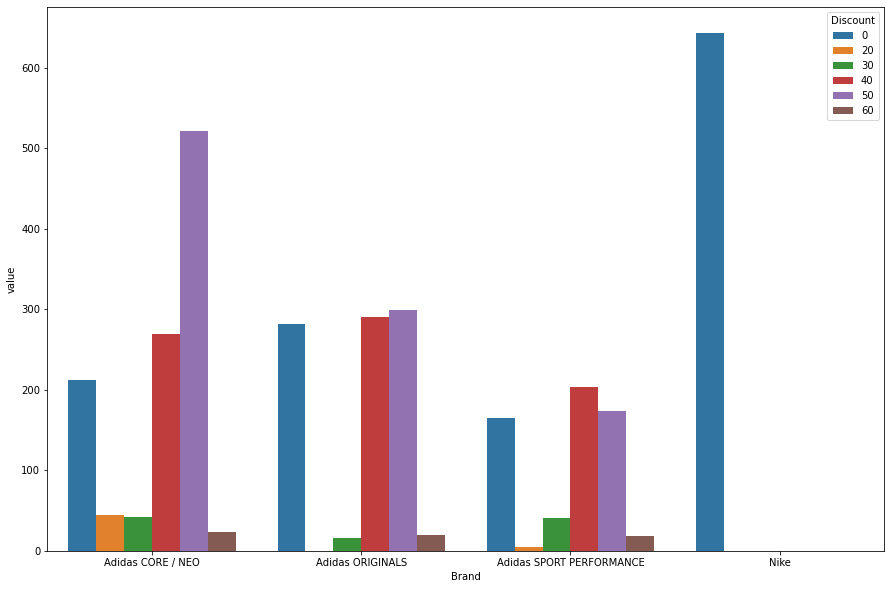

In [7]:
# Cek brand yang discount
brand_disc = pd.crosstab(produk['Brand'], (produk['Discount']))

# Buat hasil crosstab menjadi dataframe
brand_stacked = brand_disc.stack().reset_index().rename(columns={0:'value'})
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=brand_stacked.Brand, y=brand_stacked.value, hue=brand_stacked.Discount)

> Dari hasil diatas dapat diketahui bahwa tidak ada discount pada brand Nike.

> Brand Adidas CORE/NEO memiliki banyak barang yang discountnya 50% 

> Tidak ada barang yang discountnya 20% pada brand Adidas ORIGINALS.

#### Produk yang paling banyak reviews-nya yaitu?

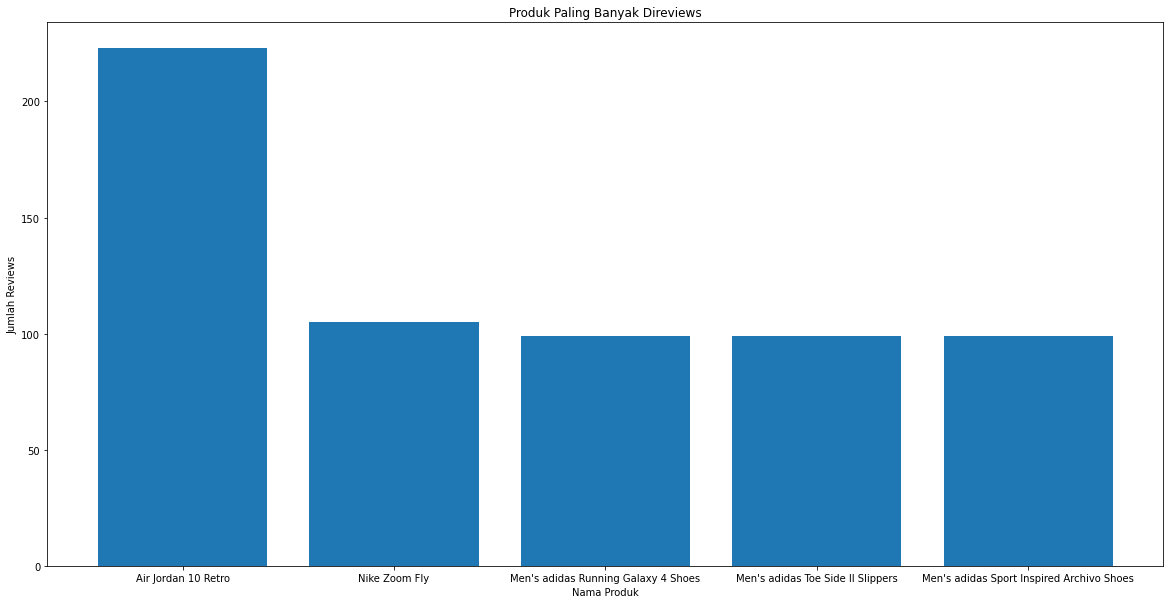

In [8]:
produk_reviews = produk.nlargest(5, "Reviews")
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(produk_reviews["Product Name"], produk_reviews["Reviews"])
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Reviews')
plt.title('Produk Paling Banyak Direviews')
plt.show()

#### Produk termahal menurut harga sebenarnya dari produk(Listing Price)?

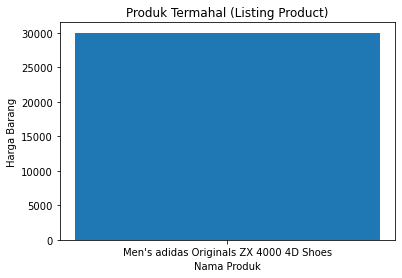

In [9]:
produk_mahal = produk.nlargest(5, "Listing Price")
plt.bar(produk_mahal["Product Name"], produk_mahal["Listing Price"])
plt.xlabel('Nama Produk')
plt.ylabel('Harga Barang')
plt.title('Produk Termahal (Listing Product)')
plt.show()

> Dari output didapat bahwa produk termahal menurut harga sebenarnya yaitu produk "Men's Adidas Originals ZX 4000 4D Shoes"

#Produk termahal menurut harga saat produk dibeli yaitu?

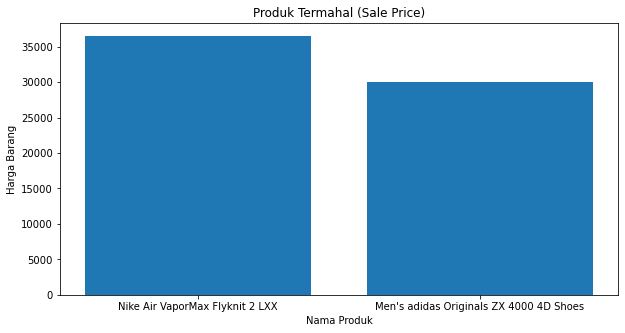

In [10]:
produk_mahal = produk.nlargest(5, "Sale Price")
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(produk_mahal["Product Name"], produk_mahal["Sale Price"])
plt.xlabel('Nama Produk')
plt.ylabel('Harga Barang')
plt.title('Produk Termahal (Sale Price)')
plt.show()

> Dari output didapatkan bahwa produk paling mahal menurut harga saat produk dibeli yaitu "Nike Air VaporMax Flyknit 2 LXX" dengan harga 36500 dan juga produk "Men's adidas Originals ZX 4000 4D Shoes" dengan harga 27999

## Data Preprocessing

### Encode Categorical

In [14]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = produk[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom dengan data kategori
cluster_data = pd.concat([encoded_data, produk[["Listing Price", "Sale Price", "Discount", "Rating"]]], axis=1)
cluster_data.head()

,Brand,Listing Price,Sale Price,Discount,Rating
0,1,14999,7499,50,4.8
1,1,7599,3799,50,3.3
2,0,999,599,40,2.6
3,0,6999,3499,50,4.1
4,1,7999,3999,50,3.5


### Features Selection
Dalam proses ini akan dipilih variabel yang memiliki pengaruh besar dalam penentuan cluster data.

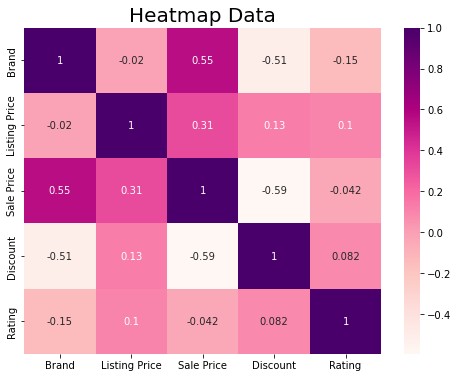

In [15]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'RdPu', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

> Dari hasil heatmap diatas diketahui bahwa korelasi terbesar dimiliki oleh variabel Brand dan Sale Price (0.55), selanjutnya disusul oleh Listing Price dan Sale Price (0.31).
Oleh karena itu, untuk selanjutnya akan digunakan 3 variabel dalam menentukan cluster data, yaitu variabel Brand, Sale Price, dan Listing Price.

In [16]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(["Discount", 
                                  "Rating"], axis = 1)
cluster_data.head()

,Brand,Listing Price,Sale Price
0,1,14999,7499
1,1,7599,3799
2,0,999,599
3,0,6999,3499
4,1,7999,3999


### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [17]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["Brand", "Listing Price", "Sale Price"]] = scaler.fit_transform(cluster_data[["Brand", "Listing Price", "Sale Price"]])
cluster_data.head()

,Brand,Listing Price,Sale Price
0,-0.213301,1.721230,0.317928
1,-0.213301,0.154740,-0.544022
2,-1.105835,-1.242400,-1.289493
3,-1.105835,0.027727,-0.613910
4,-0.213301,0.239415,-0.497431


## KMeans Cluster

### Menentukan Nilai Optimal K (kelompok)

Akan digunakan metode Elbow untuk menentukan jumlah k optimal.

In [20]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

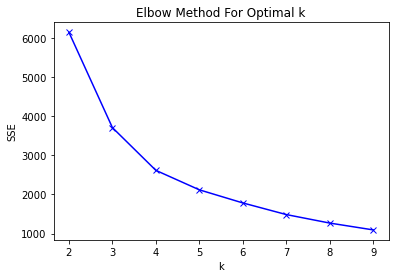

In [21]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

> Berdasarkan metode elbow pada titik siku-siku diperoleh di k=3 atau k=4, dalam pengaplikasian metode elbow pemilihan k optimal dipilih ketika jarak antara jumlah 1 dan yang lain tidak berbeda secara signifikan. Pada kasus ini nilai k yang optimal adalah 4 dikarenakan jarak antara 2 dan 3 terlalu jauh. Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [22]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.426741455232015


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.49775219622670785


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.4673428568983688


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.4742823299158101


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.4611830957075182


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.47272576779809866


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.4795013758190854


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.4996004111229226


> Dari silhouette model didapat k-kluster yang optimum adalah 3. Oleh karena itu, untuk kedepannya akan digunakan k=3 yang artinya customer akan dibagi kedalam 3 kelompok.

In [23]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [25]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([produk, segment], axis=1)
results.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2


In [26]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,0
52,Women's adidas Originals Marathon Tech Shoes,EE4954,11999,7199,40,Adidas ORIGINALS,"These shoes draft off the Marathon TR, a trail...",4.4,35,2020-04-13 15:06:19,0
85,Men's adidas Originals FuturePacer Shoes,CM8453,19999,9999,50,Adidas ORIGINALS,The Futurepacer reworks the revolutionary desi...,3.5,1,2020-04-13 15:06:21,0
86,MEN'S ADIDAS ORIGINALS MICROPACER X R1 SHOES,EE3625,15999,7999,50,Adidas ORIGINALS,These shoes are a hybrid of retro and modern a...,0.0,94,2020-04-13 15:06:21,0
123,MEN'S ADIDAS ORIGINALS BOSTON SUPER X R1 SHOES,G27834,13999,6999,50,Adidas ORIGINALS,The original Boston Super were marathon traine...,3.6,34,2020-04-13 15:06:23,0


In [27]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,2020-04-13 15:27:56,1
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,2020-04-13 15:27:56,1
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,2020-04-13 15:27:56,1
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,2020-04-13 15:27:57,1
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,2020-04-13 15:27:57,1


In [28]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited\t,segment
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13 15:06:15,2


## EDA


Bagaimana persebaran rating pada tiap cluster?

<AxesSubplot:xlabel='segment', ylabel='Rating'>

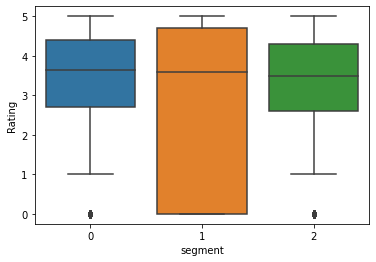

In [39]:
# Pengelompokan customer berdasarkan rating
sns.boxplot(x=results["segment"], y=results["Rating"], data=results)

> Dari output diatas didapatkan bahwa pada cluster 0 dan 2 mempunyai outlier.
Rentang data pada rating yaitu 0-5, pada cluster 1 nilai Q1 itu 0, tapi pada cluster 0 dan 1 nilai Q1 itu 1.
Median pada ke-3 cluster tersebut antara 3 s/d 4

Bagaimana persebaran Brand pada tiap cluster?

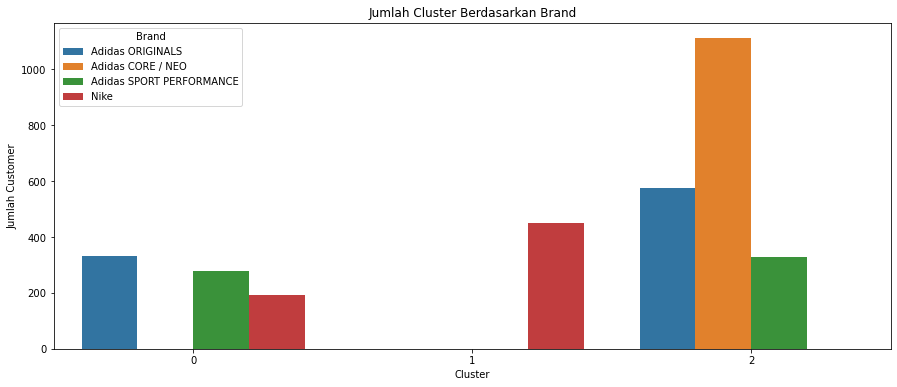

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Brand")
plt.title("Jumlah Cluster Berdasarkan Brand")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

> Dari visualisasi diatas diketahui bahwa :

- Pada cluster 0 tidak ada customer dari brand Adidas CORE/NEO.
- Pada cluster 1 semua customernya hanya dari brand Nike.
- Pada cluster 2 tidak ada customer dari brand Nike, lalu jumlah customer dari brand Adidas CORE/NEO mencapai 1000 lebih.

Bagaimana persebaran sale price ditiap cluster?

<AxesSubplot:xlabel='segment', ylabel='Sale Price'>

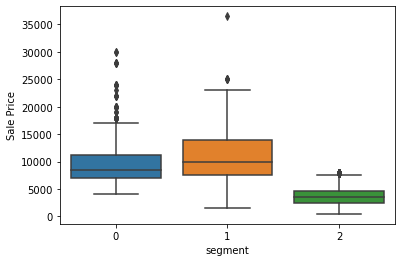

In [47]:
# Pengelompokan customer berdasarkan sale price
sns.boxplot(x=results["segment"], y=results["Sale Price"], data=results)

> dari hasil diatas didapat bahwa, semua cluster mempunyai outlier. Produk termahal terdapat pada cluster 1 yang hanya terdiri dari brand Nike.
Produk dengan rentang harga kurang dari 10000 terdapat pada cluster 2. 

# Hasil dan Kesimpulan

**Analisis Persaingan pada Setiap Brand**  

Berdasarkan hasil analisis:  

1. **Brand yang Paling Diminati**  
   Brand *Nike* mendominasi dari segi jumlah kunjungan pelanggan, menjadikannya brand dengan minat tertinggi. Hal ini terlihat dari *Cluster 1*, yang hanya terdiri dari pelanggan brand *Nike*.  

2. **Diskon dan Strategi Harga**  
   - Brand *Adidas CORE/NEO* menarik pelanggan melalui diskon besar, terutama diskon 50%. Hal ini terlihat dari *Cluster 2*, yang menunjukkan jumlah pelanggan lebih dari 1000 untuk brand ini.  
   - Sebaliknya, tidak ditemukan diskon pada produk brand *Nike*, namun brand ini tetap populer, mengindikasikan kekuatan merek dan loyalitas pelanggan.  

3. **Segmen Harga**  
   - Brand *Nike* mendominasi segmen produk premium, terlihat dari produk termahal baik berdasarkan harga asli (*listing price*) maupun harga saat pembelian (*sale price*), yang ditemukan pada *Cluster 1*.  
   - Produk dengan rentang harga lebih terjangkau (di bawah 10,000) terkonsentrasi pada brand seperti *Adidas CORE/NEO* di *Cluster 2*.  

4. **Ulasan dan Penilaian Pelanggan**  
   Produk dengan ulasan terbanyak berasal dari brand-brand besar seperti *Nike* dan *Adidas*, menunjukkan bahwa kedua brand ini berhasil menarik perhatian pelanggan secara signifikan.  

**Kesimpulan dan Rekomendasi**  
- Brand *Nike* dapat fokus pada produk premium tanpa memberikan banyak diskon, memanfaatkan loyalitas pelanggan dan kekuatan merek.  
- Brand *Adidas CORE/NEO* memiliki potensi besar untuk menarik pelanggan dalam segmen menengah melalui strategi diskon yang efektif.  
- Untuk memenuhi kebutuhan pasar secara optimal, perlu dipertimbangkan penyempurnaan tampilan website dengan pengelompokan produk berdasarkan harga, diskon, dan ulasan. Hal ini dapat meningkatkan pengalaman pelanggan dan memperkuat posisi toko di pasar online.  